# Task 4 : To Explore Decision Tree Classifier
In this task, we are given 'Iris' dataset. We have to fit a Decision Tree Classifier and visualize it graphically.# 

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Reading The Data¶

In [2]:
#Import Data
data = pd.read_csv(r'C:\Users\dattatray\Downloads\Iris.csv')
print('data')

data.head(10)

data


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


# Insights From Data

In [3]:
#Data Dimension
data.shape

(150, 6)

In [4]:
#Data Column
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
#Data Summary
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
#Data Info and Structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
#Checking Missing Value
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Plotting Different Types of Plots

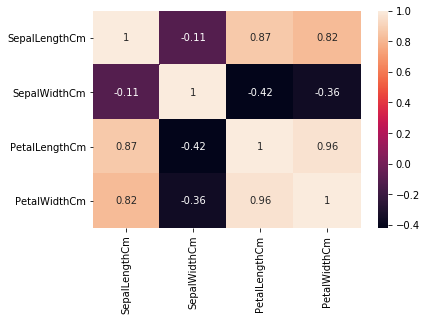

In [8]:
#Building Correlation Matrix
new_data = data.drop('Id', axis = 1)
sns.heatmap(new_data.corr(), annot = True)

C:\Users\omkar thakur\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


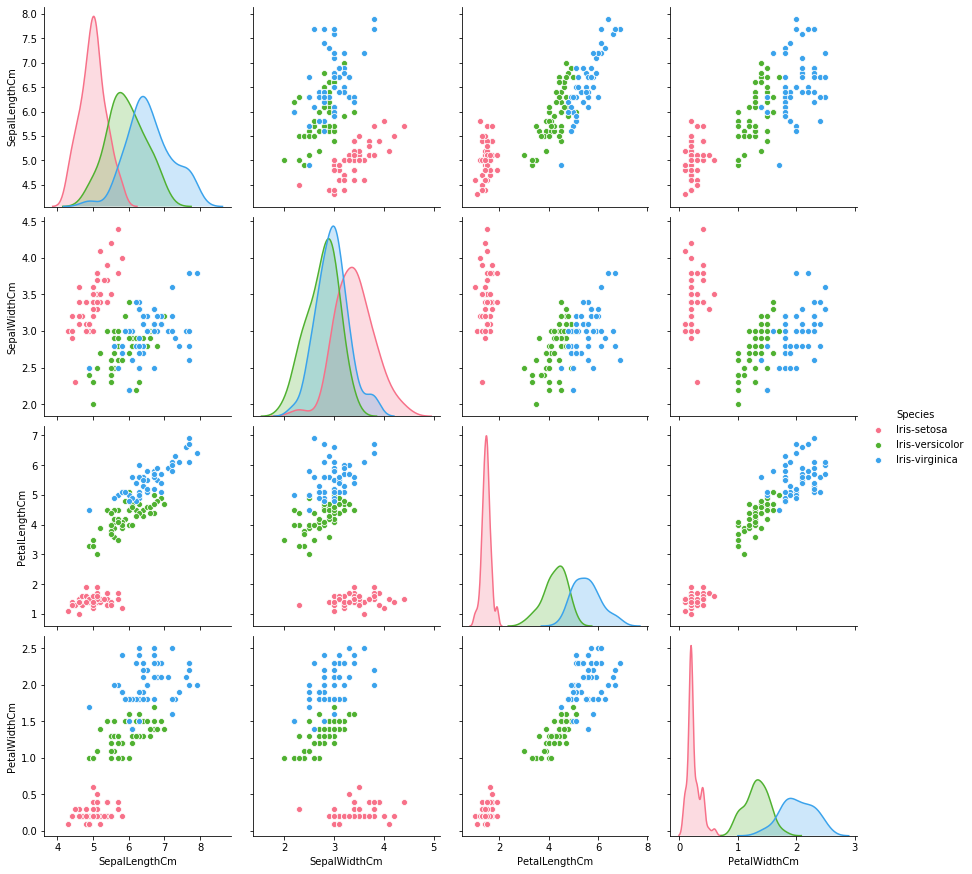

In [9]:
#Plotting Pair Plots
sns.pairplot(new_data, hue="Species", palette="husl", size=3, diag_kind="kde")

# Splitting The Data

In [10]:
#Preparing the Data
X = data.iloc[:, 1:4].values
y = data.iloc[:, -1].values

In [11]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [12]:
#Splitting the Dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Training The Model

In [13]:
#Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 0)
classifier = classifier.fit(X_train, y_train)

# Predicting

In [14]:
#Predicting the Test set results
y_pred = classifier.predict(X_test)

In [15]:
#Comparing Actual and Predicted Values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0
5,2,2
6,0,0
7,1,1
8,1,1
9,1,1


# Evaluating The Model

In [16]:
#Confusion Matrix and Accuracy Score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


0.9666666666666667

# Visualization

[Text(523.125, 1026.8, 'X[2] <= 2.35\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(406.875, 906.0, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(639.375, 906.0, 'X[2] <= 4.75\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(348.75, 785.2, 'X[0] <= 4.95\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(232.5, 664.4, 'X[1] <= 2.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(116.25, 543.6, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(348.75, 543.6, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(465.0, 664.4, 'gini = 0.0\nsamples = 31\nvalue = [0, 31, 0]'),
 Text(930.0, 785.2, 'X[2] <= 5.05\ngini = 0.187\nsamples = 48\nvalue = [0, 5, 43]'),
 Text(697.5, 664.4, 'X[0] <= 6.5\ngini = 0.48\nsamples = 10\nvalue = [0, 4, 6]'),
 Text(581.25, 543.6, 'X[1] <= 3.1\ngini = 0.375\nsamples = 8\nvalue = [0, 2, 6]'),
 Text(465.0, 422.79999999999995, 'X[0] <= 6.2\ngini = 0.245\nsamples = 7\nvalue = [0, 1, 6]'),
 Text(348.75, 302.0, 'gini = 0.0\

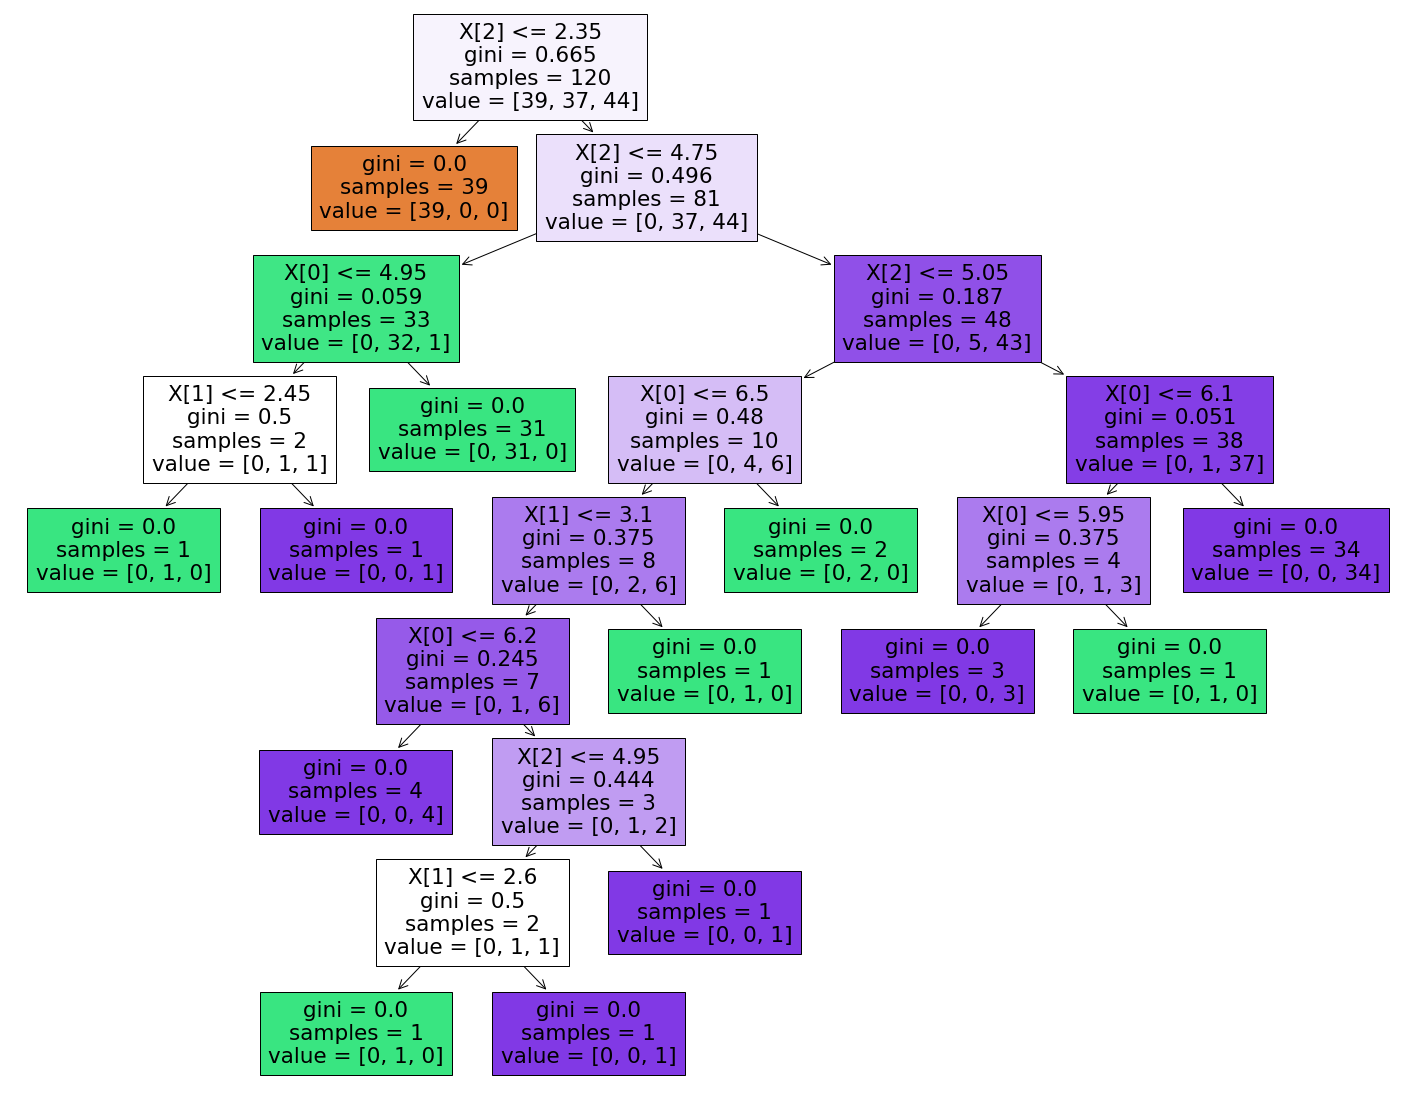

In [17]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,20))
plt.title('Decision Tree Classifier')
plot_tree(classifier, filled = True)